In [7]:
# import all the necessary modules
import os
import rasterio
import numpy as np
%matplotlib inline
import xarray as rxr
from glob import glob
from rasterio.plot import show
import matplotlib.pyplot as plt

In [13]:
# define input path
before_data_path = "before"
after_data_path = "after"
pattern = "*B[5-6]*.TIF"

band_before_path = glob(os.path.join(before_data_path,pattern))
band_before_path
#cloud = glob(os.path.join(before_data_path,pattern))
band_after_path = glob(os.path.join(after_data_path,pattern))
band_after_path

['after\\LC08_L2SP_016041_20221014_20221021_02_T1_SR_B5.TIF',
 'after\\LC08_L2SP_016041_20221014_20221021_02_T1_SR_B6.TIF']

In [10]:
def combine_tifs(tif_list):
    """A function that combines a list of tifs in the same CRS
    and of the same extent into an xarray object

    Parameters
    ----------
    tif_list : list
        A list of paths to the tif files that you wish to combine.

    Returns
    -------
    An xarray object with all of the tif files in the listmerged into 
    a single object.

    """

    out_xr = []
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"] = i+1

    return rxr.concat(out_xr, dim="band")

In [11]:
# WGS84 coordinates
minx, miny = 24.60, 60.00
maxx, maxy = 25.22, 60.35
bounding_box = box(minx, miny, maxx, maxy)

NameError: name 'box' is not defined

In [15]:
before = combine_tifs(band_before_path)
after = combine_tifs(band_after_path)

C:\Users\Gokul G\AppData\Local\Temp\ipykernel_6356\381812906.py:19: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
C:\Users\Gokul G\AppData\Local\Temp\ipykernel_6356\381812906.py:19: DeprecationWarning: open_rasterio is Deprecated in favor of rioxarray. For information about transitioning, see: https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html
  out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())


In [18]:
before_ndbi = before[1]-before[0]/before[1]+before[0]
before_ndbi.mean


<bound method DataArrayReductions.mean of <xarray.DataArray (y: 7801, x: 7671)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y        (y) float64 3.151e+06 3.151e+06 3.151e+06 ... 2.917e+06 2.917e+06
  * x        (x) float64 3.24e+05 3.24e+05 3.241e+05 ... 5.541e+05 5.541e+05>

In [17]:
after_ndbi = after[1]-after[0]/after[1]+after[0]
after_ndbi

<xarray.DataArray (y: 7801, x: 7671)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y        (y) float64 3.151e+06 3.151e+06 3.151e+06 ... 2.917e+06 2.917e+06
  * x        (x) float64 3.279e+05 3.279e+05 3.28e+05 ... 5.58e+05 5.58e+05

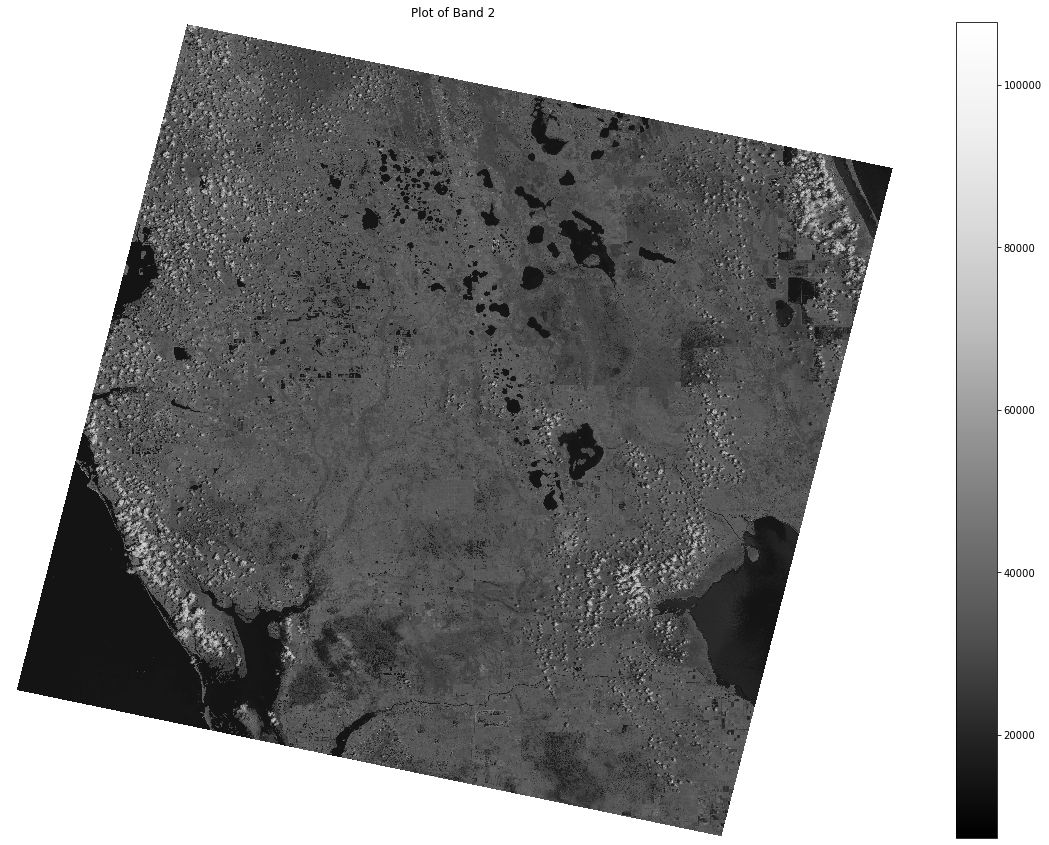

In [8]:
fig, ax = plt.subplots(figsize=(20, 15))

before_ndbi.plot.imshow(cmap="Greys_r",
                            ax=ax)
ax.set_title("Plot of before NDBI")
ax.set_axis_off()
plt.show()

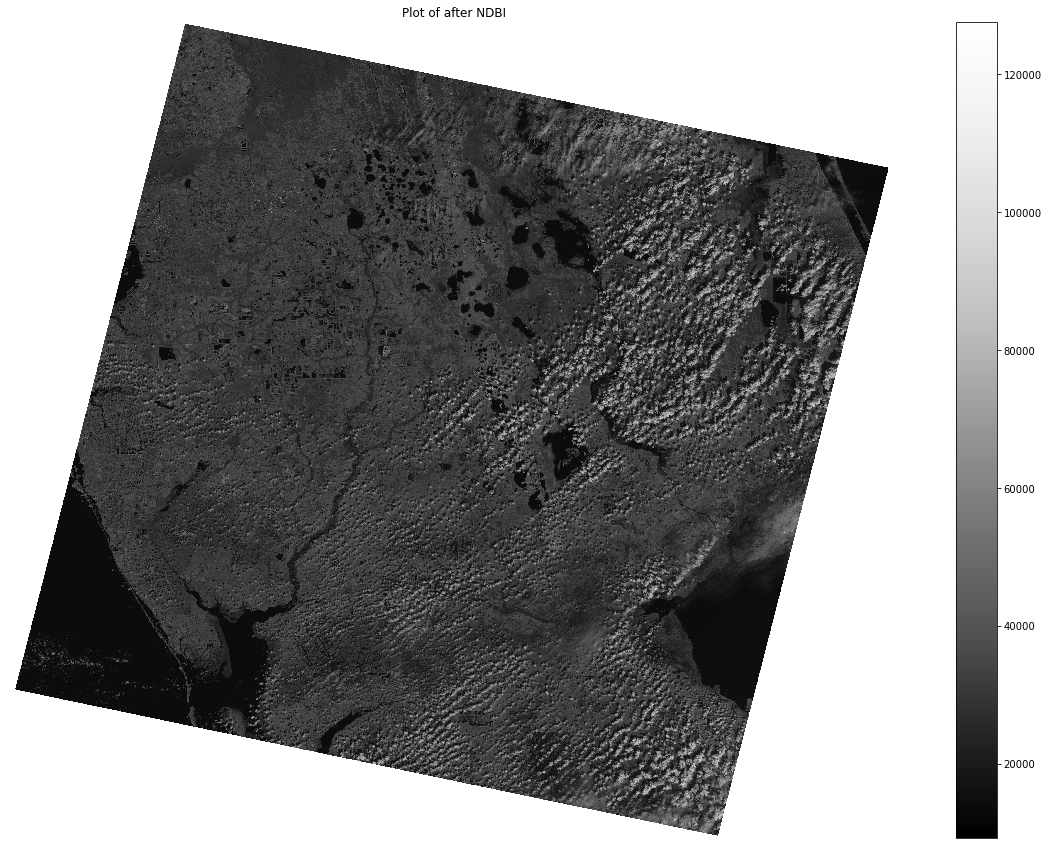

In [9]:
fig, ax = plt.subplots(figsize=(20, 15))
after_ndbi.plot.imshow(cmap="Greys_r",
                            ax=ax)
ax.set_title("Plot of after NDBI")
ax.set_axis_off()
plt.show()

In [11]:
ndbi = before_ndbi - after_ndbi
ndbi.mean()

<xarray.DataArray ()>
array(996.06288899)

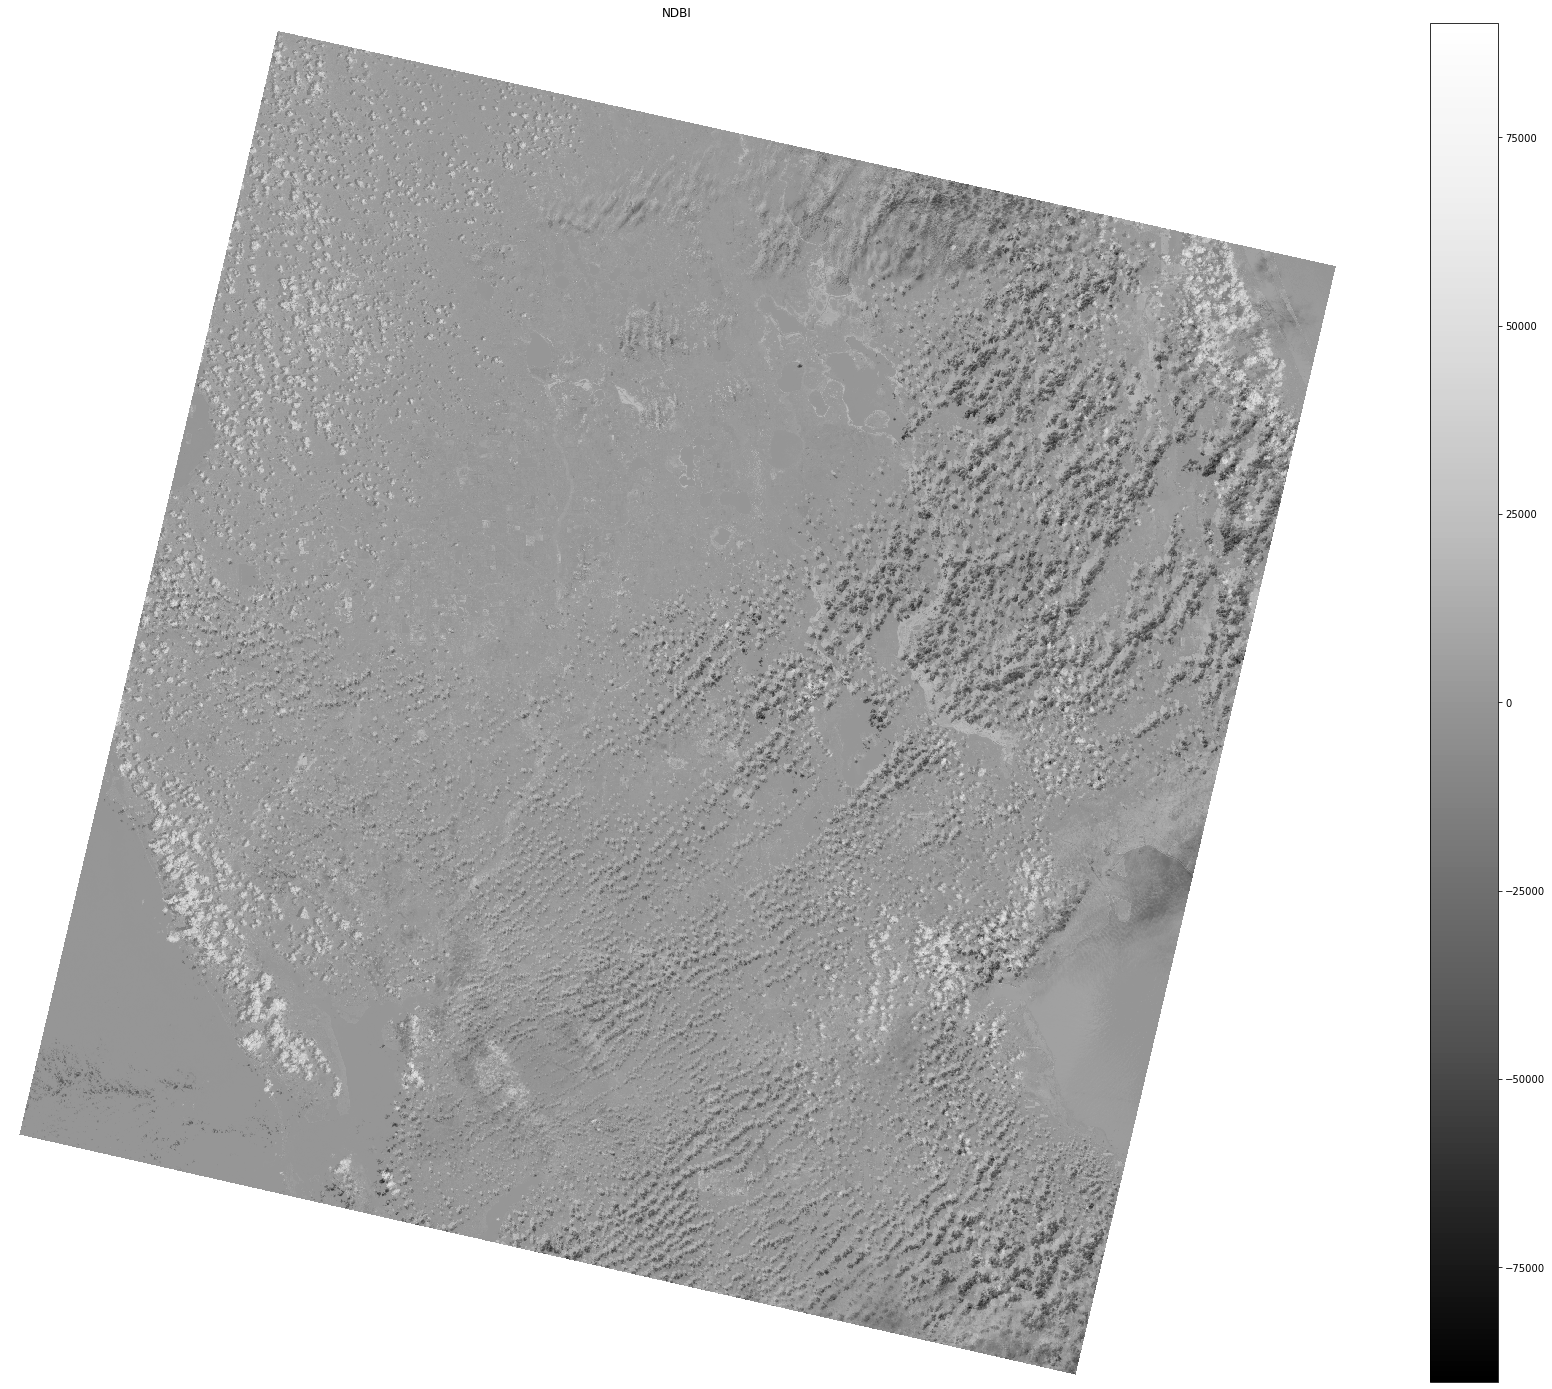

In [12]:
fig, ax = plt.subplots(figsize=(30, 25))
ndbi.plot.imshow(cmap="Greys_r",
                            ax=ax)
ax.set_title("NDBI")
ax.set_axis_off()
plt.show()